<a href="https://colab.research.google.com/github/sungjin-kim-data/ML_PROJECT/blob/master/PROJECT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [428]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [429]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as shc

from scipy.stats import pearsonr, chi2_contingency
from itertools import combinations

In [430]:
df = pd.read_csv('/content/Shipping Data.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


**ID**: ID Number of Customers.  
**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.  
**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.  
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.  
**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).  
**Cost of the product**: Cost of the Product in US Dollars.  
**Prior purchases**: The Number of Prior Purchase.  
**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.  
**Gender**: Male and Female.  
**Discount offered**: Discount offered on that specific product.  
**Weight in gms**: It is the weight in grams.  
**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [431]:
df.shape

(10999, 12)

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [433]:
# id drop

df.drop('ID', axis = 1, inplace = True)
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [434]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [435]:
df.describe(include=np.object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [436]:
# 음수 값 확인
print(min(df['Cost_of_the_Product']), max(df['Cost_of_the_Product']))
print(min(df['Weight_in_gms']), max(df['Weight_in_gms']))

96 310
1001 7846


In [437]:
# 데이터 내용 정리해서 출력하기
print("총 데이터 수: ", df.shape[0]*df.shape[1])
print("총 결측치 수: {} / 전체데이터의 {:.2f}% ".format(df.isnull().sum().sum(), (df.isnull().sum().sum()*100)/(df.shape[0]*df.shape[1])))
print("총 중복 수: ", len(df[df.duplicated()]))

총 데이터 수:  120989
총 결측치 수: 0 / 전체데이터의 0.00% 
총 중복 수:  0


In [438]:
# 현 데이터는 다행이 결측치 및 중복이 없다.

In [439]:
# lower 적용
df.columns = df.columns.str.lower()
df.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n'],
      dtype='object')

In [440]:
# reached.on.time_y.n '.' 을 '_'으로 변경
df = df.rename(columns = {"reached.on.time_y.n" : "reached_on_time_y_n"})
df.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y_n'],
      dtype='object')

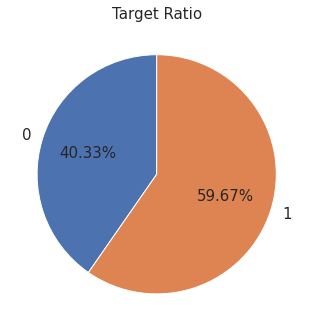

In [441]:
df["reached_on_time_y_n"].value_counts(normalize=True)
zero = (df['reached_on_time_y_n'] == 0).sum()
one = (df['reached_on_time_y_n'] == 1).sum()

plt.pie((zero, one),labels=(0, 1),autopct="%.2f%%",startangle=90, textprops={'fontsize': 15})
plt.title('Target Ratio', fontsize=15)
plt.show()

In [443]:
df.columns

Index(['warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y_n'],
      dtype='object')

In [444]:
# warehouse_block counts
x_block = df['warehouse_block'].value_counts().index
y_block = df['warehouse_block'].value_counts().values
colors = sns.color_palette('hls', len(x_block))

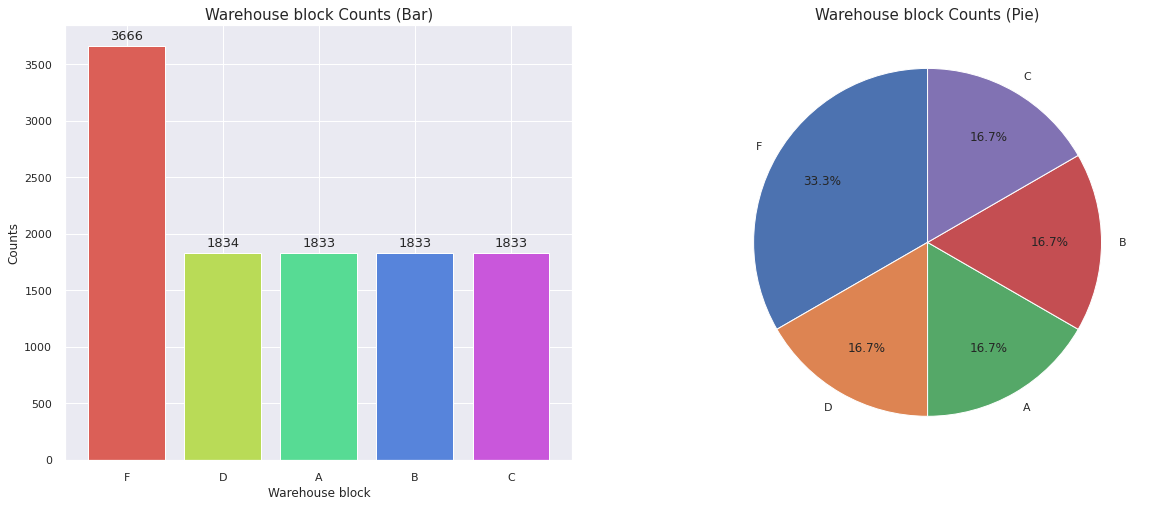

In [445]:
plt.figure(figsize=(20, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# bar
bar = axs1.bar(x_block, y_block, color=colors)
axs1.set_title('Warehouse block Counts (Bar)', fontsize=15)
axs1.set_xlabel('Warehouse block')
axs1.set_ylabel('Counts', rotation=90)

for idx, rect in enumerate(bar):
  axs1.text(idx, rect.get_height() + 50, y_block[idx], ha='center', fontsize=13)

# pie
def autopct(pct):
  return ('%.1f%%' % pct) if pct >= 10 else ''

axs2.pie(y_block, labels=x_block, startangle=90, pctdistance=0.7, autopct=autopct)
axs2.set_title('Warehouse block Counts (Pie)', fontsize=15)

plt.show()

In [446]:
# mode_of_shipment counts
x_shipment = df['mode_of_shipment'].value_counts().index
y_shipment = df['mode_of_shipment'].value_counts().values
colors = sns.color_palette('hls', len(x_shipment))

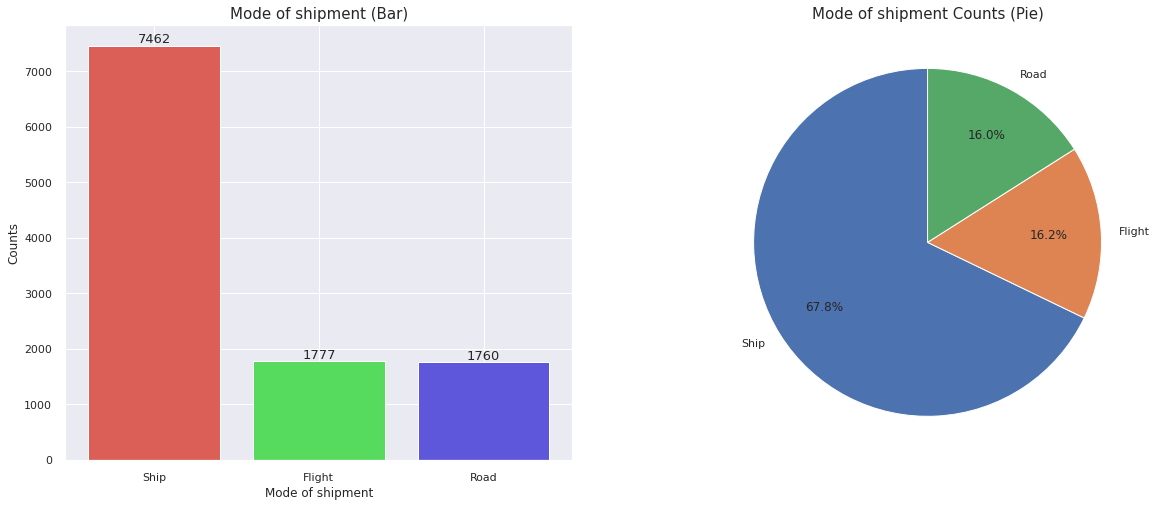

In [447]:
plt.figure(figsize=(20, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# bar
bar = axs1.bar(x_shipment, y_shipment, color=colors)
axs1.set_title('Mode of shipment (Bar)', fontsize=15)
axs1.set_xlabel('Mode of shipment')
axs1.set_ylabel('Counts', rotation=90)

for idx, rect in enumerate(bar):
  axs1.text(idx, rect.get_height() + 50, y_shipment[idx], ha='center', fontsize=13)

# pie
def autopct(pct):
  return ('%.1f%%' % pct) if pct >= 10 else ''

axs2.pie(y_shipment, labels=x_shipment, startangle=90, pctdistance=0.7, autopct=autopct)
axs2.set_title('Mode of shipment Counts (Pie)', fontsize=15)

plt.show()

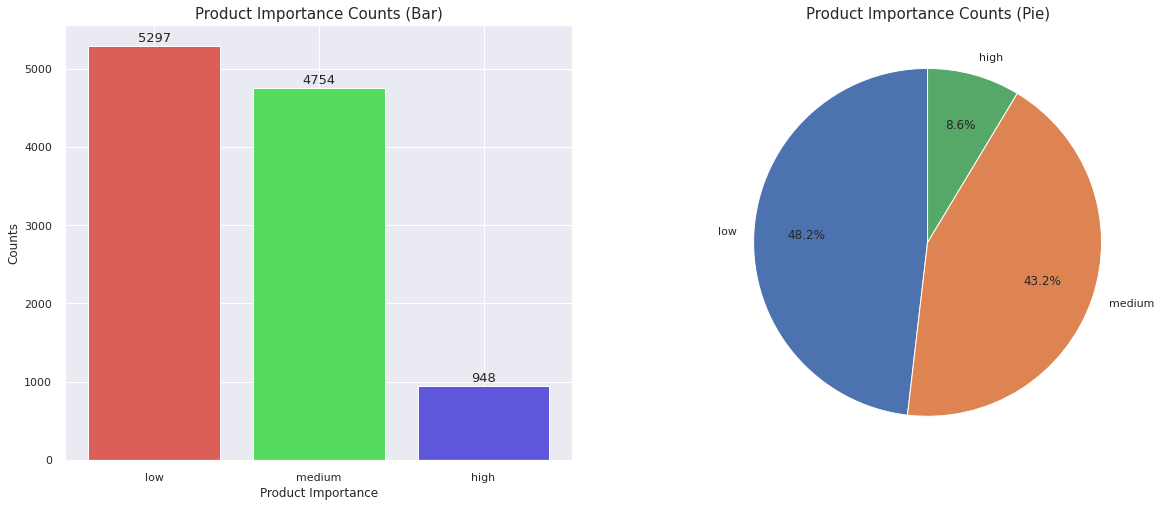

In [448]:
# Product_importance counts
x_importance = df['product_importance'].value_counts().index
y_importance = df['product_importance'].value_counts().values
colors = sns.color_palette('hls', len(x_shipment))

plt.figure(figsize=(20, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# bar
bar = axs1.bar(x_importance, y_importance, color=colors)
axs1.set_title('Product Importance Counts (Bar)', fontsize=15)
axs1.set_xlabel('Product Importance')
axs1.set_ylabel('Counts', rotation=90)

for idx, rect in enumerate(bar):
  axs1.text(idx, rect.get_height() + 50, y_importance[idx], ha='center', fontsize=13)

# pie
def autopct(pct):
  return ('%.1f%%' % pct) if pct >= 5 else ''

axs2.pie(y_importance, labels=x_importance, startangle=90, pctdistance=0.7, autopct=autopct)
axs2.set_title('Product Importance Counts (Pie)', fontsize=15)

plt.show()

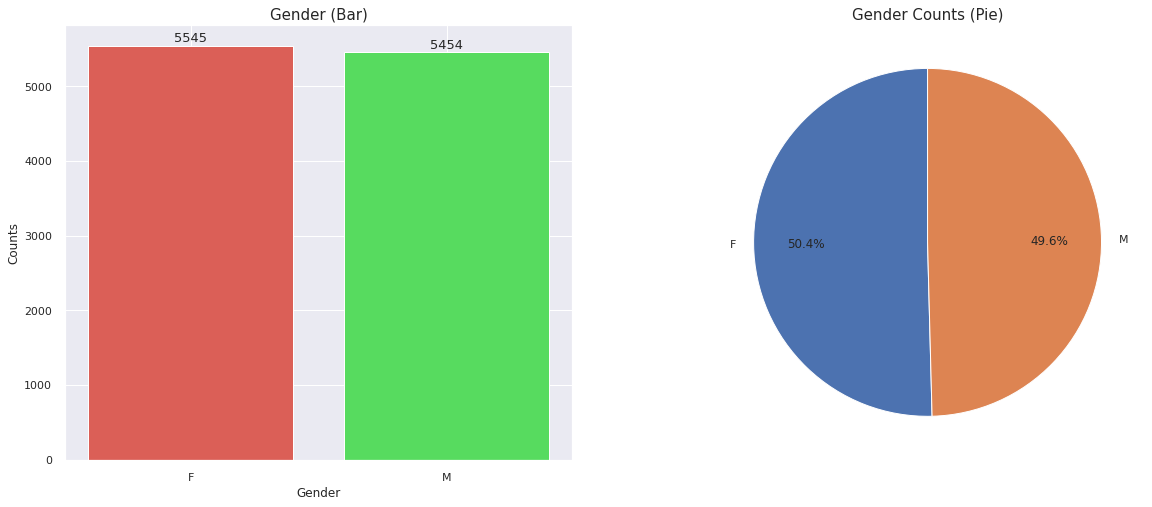

In [449]:
# gender counts
x_gender = df['gender'].value_counts().index
y_gender = df['gender'].value_counts().values
colors = sns.color_palette('hls', len(x_shipment))

plt.figure(figsize=(20, 8))
axs1 = plt.subplot(1, 2, 1)
axs2 = plt.subplot(1, 2, 2)

# bar
bar = axs1.bar(x_gender, y_gender, color=colors)
axs1.set_title('Gender (Bar)', fontsize=15)
axs1.set_xlabel('Gender')
axs1.set_ylabel('Counts', rotation=90)

for idx, rect in enumerate(bar):
  axs1.text(idx, rect.get_height() + 50, y_gender[idx], ha='center', fontsize=13)

# pie
def autopct(pct):
  return ('%.1f%%' % pct) if pct >= 5 else ''

axs2.pie(y_gender, labels=x_gender, startangle=90, pctdistance=0.7, autopct=autopct)
axs2.set_title('Gender Counts (Pie)', fontsize=15)

plt.show()

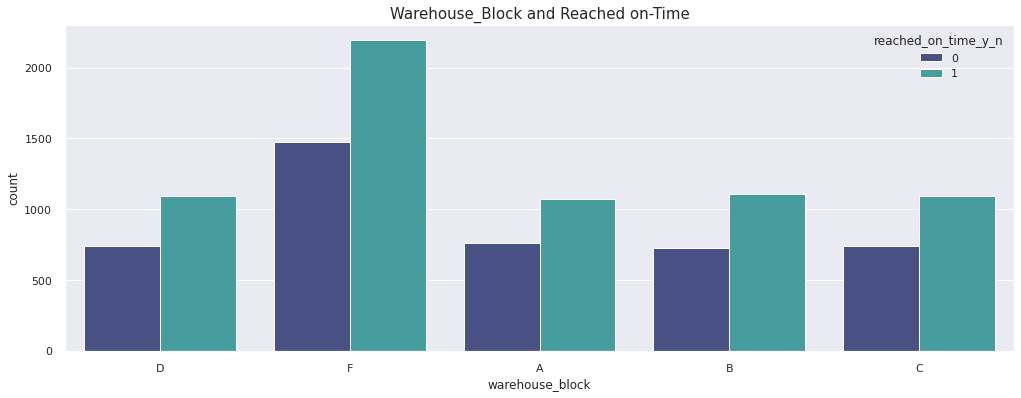

In [450]:
plt.figure(figsize = (17, 6))
sns.countplot('warehouse_block', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Warehouse_Block and Reached on-Time', fontsize=15)
plt.show()

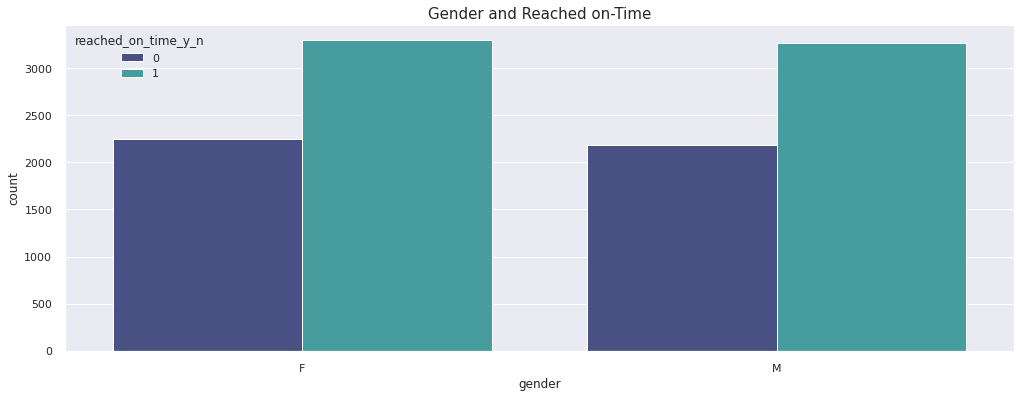

In [451]:
plt.figure(figsize = (17, 6))
sns.countplot('gender', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Gender and Reached on-Time', fontsize=15)
plt.show()

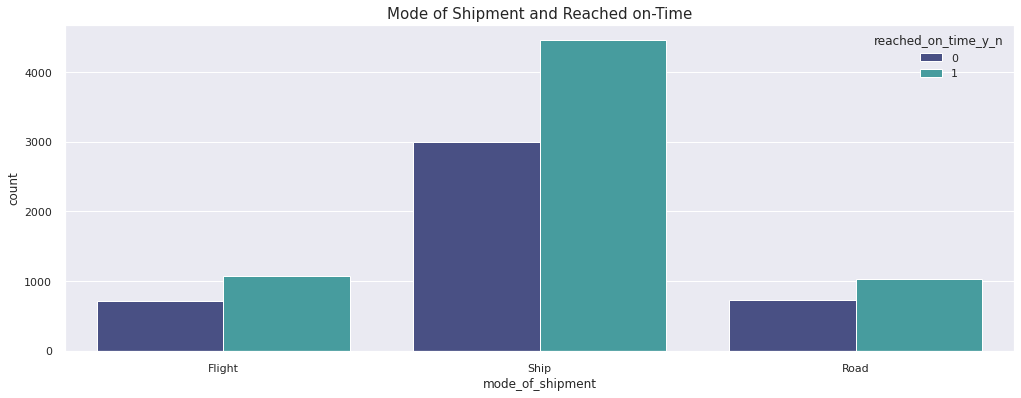

In [452]:
plt.figure(figsize = (17, 6))
sns.countplot('mode_of_shipment', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Mode of Shipment and Reached on-Time', fontsize=15)
plt.show()

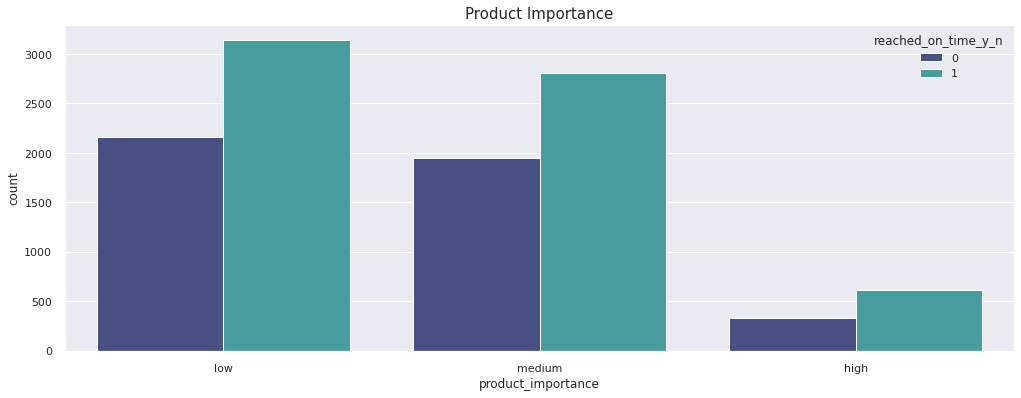

In [453]:
plt.figure(figsize = (17, 6))
sns.countplot('product_importance', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Product Importance', fontsize=15) 
plt.show()

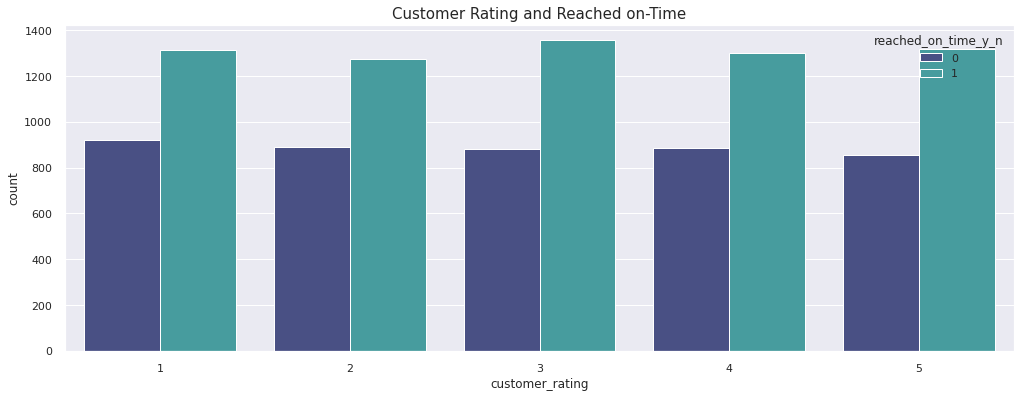

In [454]:
plt.figure(figsize = (17, 6))
sns.countplot('customer_rating', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Customer Rating and Reached on-Time' , fontsize=15)
plt.show()

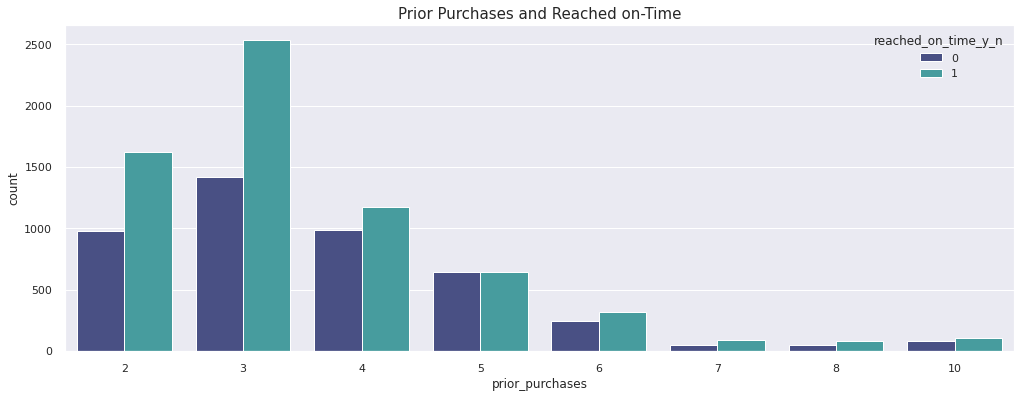

In [455]:
plt.figure(figsize = (17, 6))
sns.countplot('prior_purchases', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Prior Purchases and Reached on-Time' , fontsize=15)
plt.show()

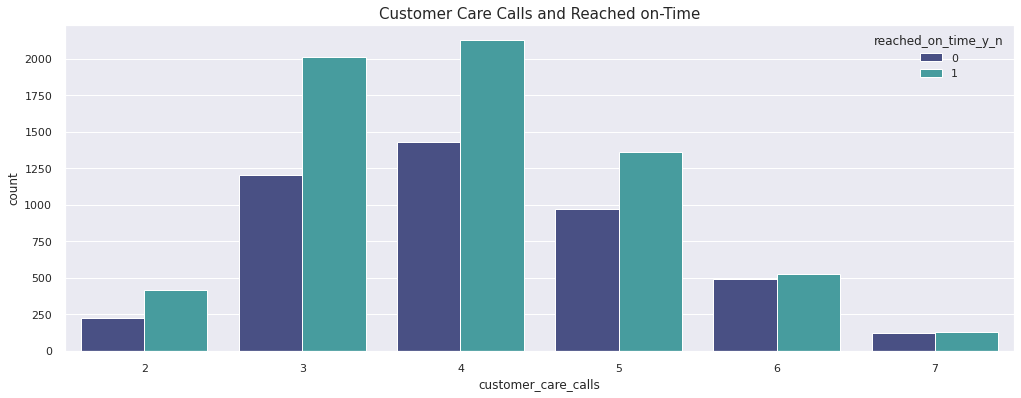

In [456]:
plt.figure(figsize = (17, 6))
sns.countplot('customer_care_calls', hue = 'reached_on_time_y_n', data = df, palette='mako')
plt.title('Customer Care Calls and Reached on-Time' , fontsize=15)
plt.show()

In [457]:
fig = px.box(data_frame = df, x = 'reached_on_time_y_n', y = 'cost_of_the_product', 
       color = 'reached_on_time_y_n')
fig.show(renderer='colab')

In [458]:
# 어떤 유형의 운송수단이 가장 많은 중량을 운반하는지 확인

fig = px.histogram(data_frame = df, x = 'weight_in_gms', nbins = 100, color = 'mode_of_shipment',
  marginal = 'box')
fig.show(renderer='colab')

# 배로 운송되는 제품의 수가 가장 많은 것을 알 수 있다

In [459]:
# 배송 방식이 제품 가격에 영향을 미치는지 여부 확인

fig = px.histogram(data_frame = df, x = 'cost_of_the_product', nbins = 100, color = 'mode_of_shipment',
  marginal = 'box')
fig.show(renderer='colab')

In [460]:
# 창고 블록이 제품 가격에 영향을 미치는지 확인

fig = px.histogram(data_frame = df, x = 'cost_of_the_product', nbins = 100, color = 'warehouse_block',
  marginal = 'box')
fig.show(renderer='colab')

# F 창고에 있는 제품들의 금액이 가장 많은 것을 알 수 있다.

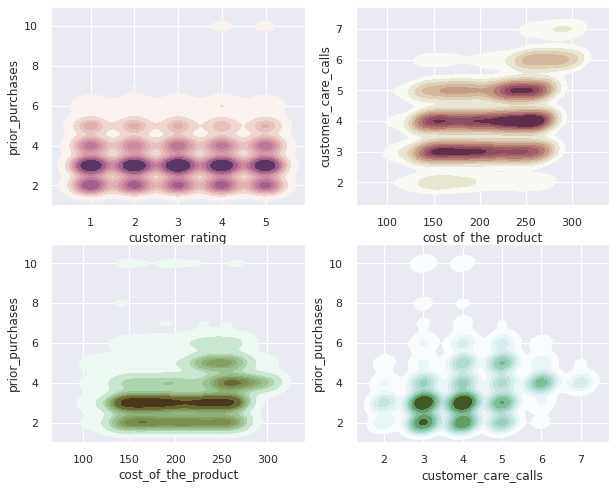

In [461]:
# 각 특성별 분포 kde 확인

f, axes = plt.subplots(2, 2, figsize=(10, 8))


cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(
    data=df, x='customer_rating', y='prior_purchases', cmap=cmap, ax=axes[0, 0], shade=True)

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
sns.kdeplot(
    data=df, x='cost_of_the_product', y='customer_care_calls',cmap=cmap, ax=axes[0, 1], shade=True)

cmap = sns.cubehelix_palette(start=1.0, light=1,as_cmap=True)
sns.kdeplot(
    data=df, x='cost_of_the_product', y='prior_purchases',cmap=cmap, ax=axes[1, 0], shade=True)

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
sns.kdeplot(
    data=df, x='customer_care_calls', y='prior_purchases',cmap=cmap, ax=axes[1, 1], shade=True);


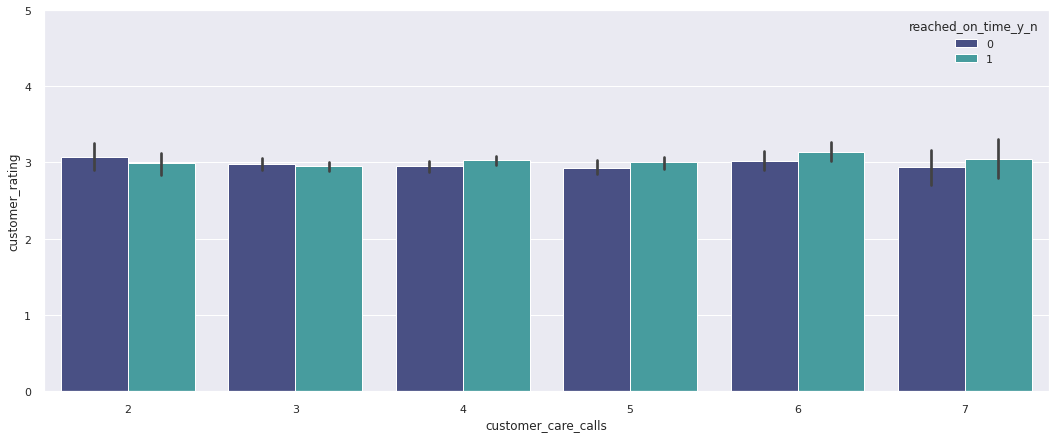

In [462]:
# 정시 배송 도착 여부에 따른 콜센터 전화 여부 및 고객 평가 확인

plt.figure(figsize = (18, 7))
sns.barplot(x = 'customer_care_calls', y = 'customer_rating', hue = 'reached_on_time_y_n', data = df, palette = 'mako')
plt.ylim(0, 5)
plt.show()

# 정시 배송 도착하지 않았을 때 콜센터 전화가 더 많고, 도착했을 때는 전화가 덜 간 것을 확인할 수 있다.

In [463]:
df.groupby('reached_on_time_y_n').mean()

# 정시 도착한 제품은 할인이 된 제품이라고 그렇지 않은 제품은 할인이 없는 제품인 것을 확인할 수 있다.

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms
reached_on_time_y_n,,,,,,
0,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395
1,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104


In [464]:
df.groupby('reached_on_time_y_n').median()

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms
reached_on_time_y_n,,,,,,
0,4.0,3.0,222.0,3.0,6.0,4674.0
1,4.0,3.0,209.0,3.0,9.0,3231.0


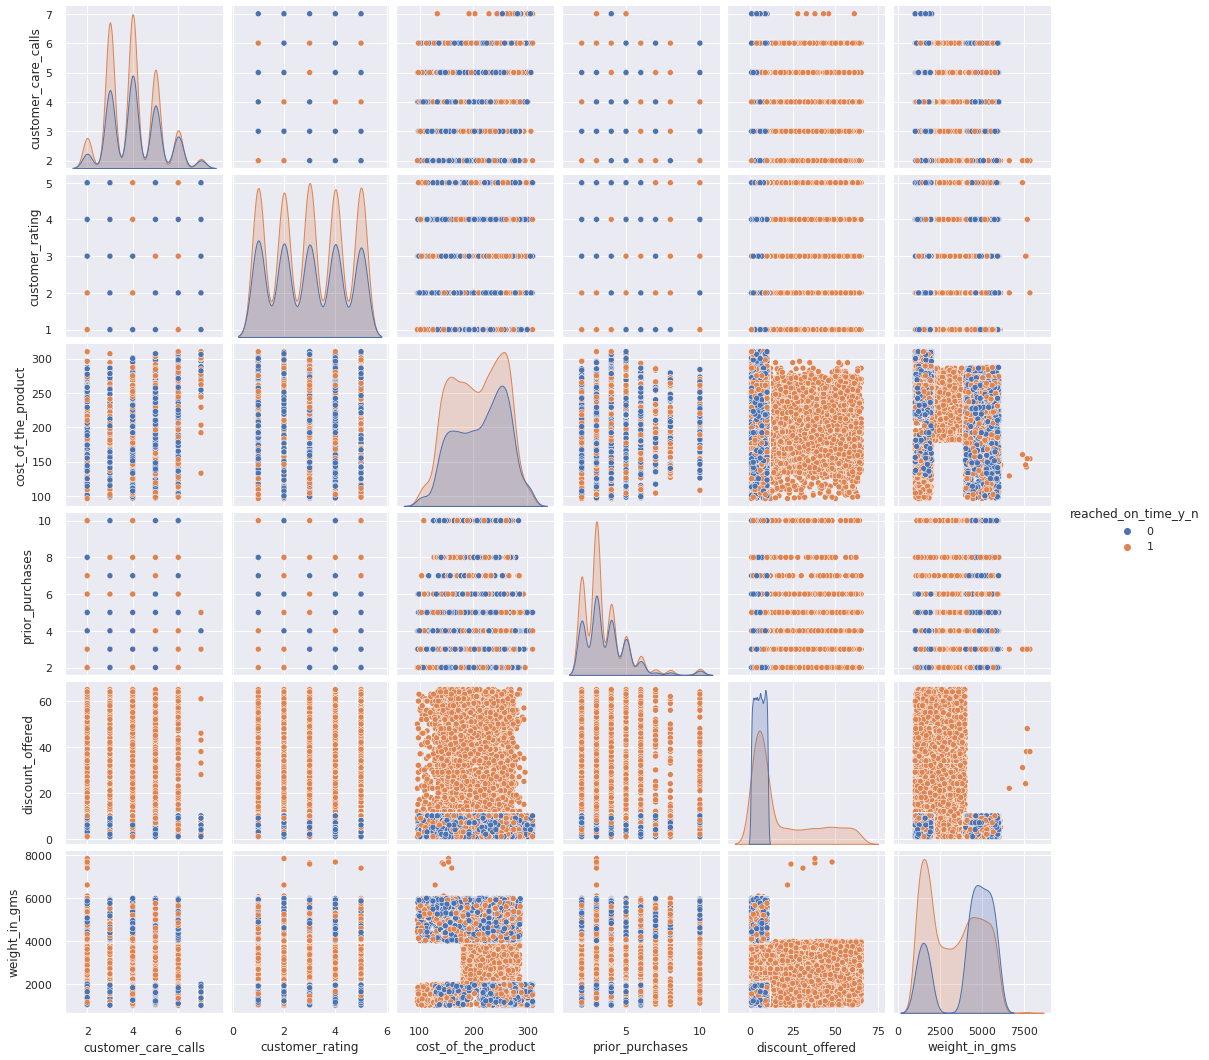

In [465]:
hue = 'reached_on_time_y_n'
sns.pairplot(df.select_dtypes(include=np.number), hue=hue)
plt.show()

# pairplot을 봤을 때는 이것으로 파악하기는 어렵다

In [466]:
# 처음에 내가 생각했던 가설과는 다른 양상을 보여준다.

In [467]:
# 범주형 데이터
cat = df.select_dtypes(include=['object']).columns.values
df_cat = df[cat].copy()
df_cat

,warehouse_block,mode_of_shipment,product_importance,gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


In [468]:
df_ohe = pd.get_dummies(df_cat)
df_ohe

,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium,gender_F,gender_M
0,0,0,0,1,0,1,0,0,0,1,0,1,0
1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,0,0,0,0,1,0,0,1,0,0,1,0,1


In [472]:
# 숫자형 데이터
num_feat = df.select_dtypes('number').columns.values
df_num = df[num_feat].copy()
df_num

,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached_on_time_y_n
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1
...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1
10995,4,1,232,5,6,1247,0
10996,5,4,242,5,4,1155,0
10997,5,2,223,6,2,1210,0


In [474]:
df_num = df_num.drop(['reached_on_time_y_n'], axis=1)

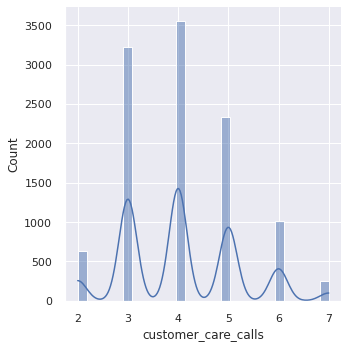

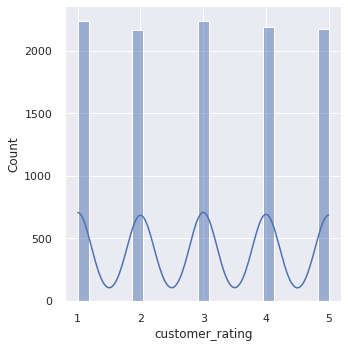

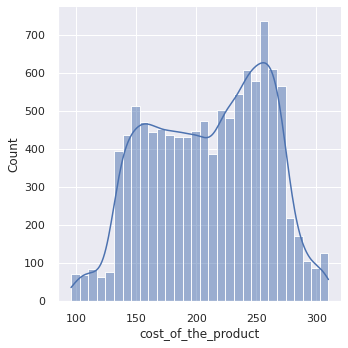

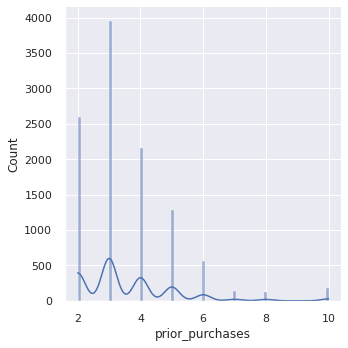

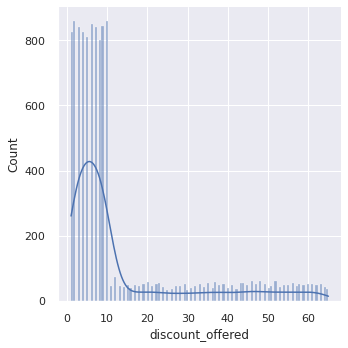

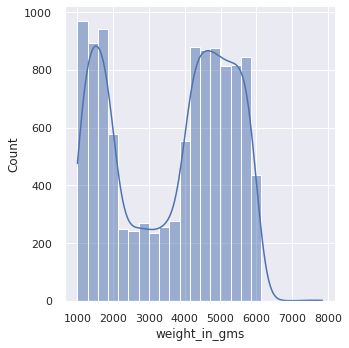

In [476]:
col_att_num = df_num.columns.values

for i in range(0, len(col_att_num)):
  sns.displot(df_num[col_att_num[i]], kde=True)

# 위에서 확인했던데로 할인률은 아래쪽으로 몰려있고, 무게 또한 가볍거나 무겁거나로 치중되어있다

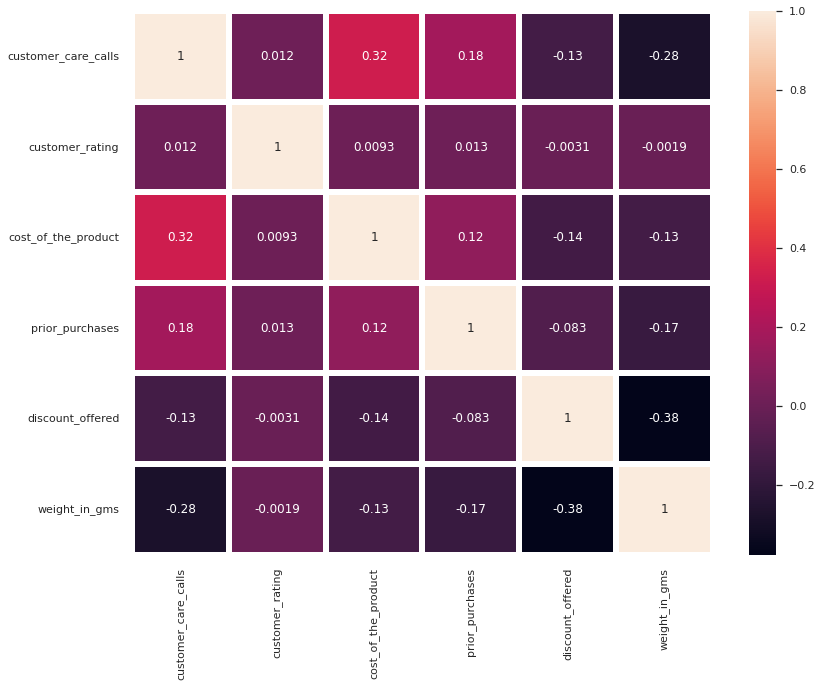

In [480]:
# num 별 높은 상관계수가 있는지 확인

corr = df_num.corr()  
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, linewidth = 5);

# 높은 corr은 없는 것으로 확인

In [481]:
df_ohe.nunique()

warehouse_block_A            2
warehouse_block_B            2
warehouse_block_C            2
warehouse_block_D            2
warehouse_block_F            2
mode_of_shipment_Flight      2
mode_of_shipment_Road        2
mode_of_shipment_Ship        2
product_importance_high      2
product_importance_low       2
product_importance_medium    2
gender_F                     2
gender_M                     2
dtype: int64

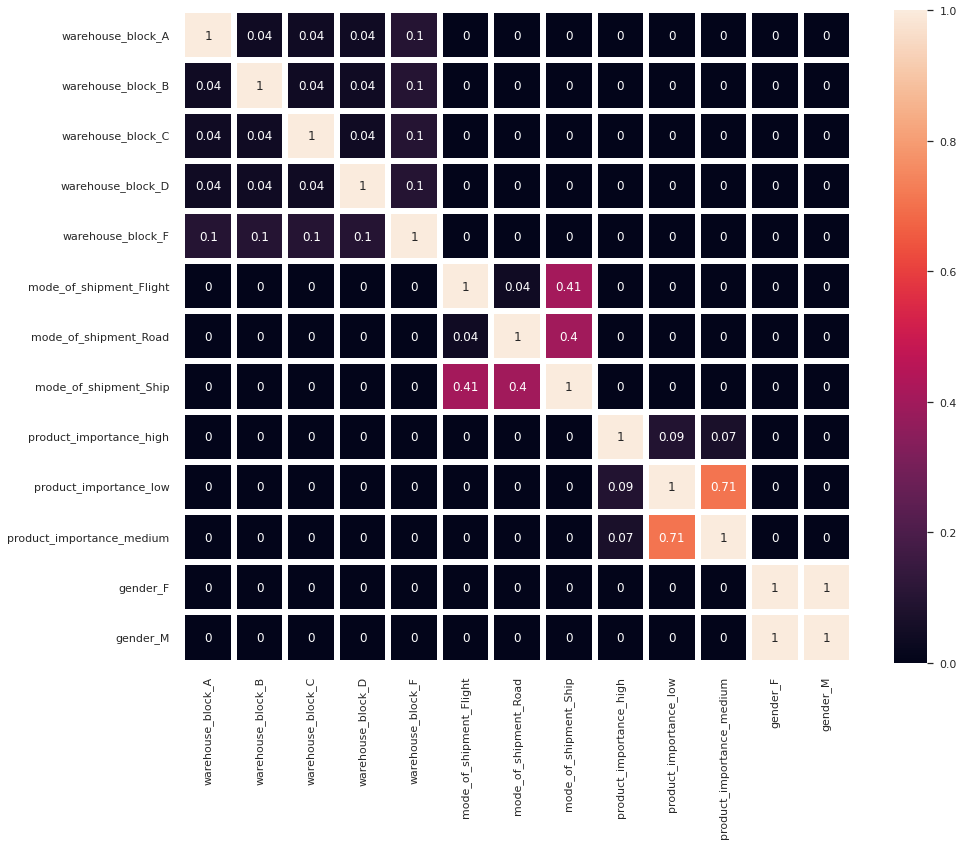

In [488]:
from scipy.stats import chi2_contingency

def cramers_V(var_1, var_2):
  crosstab = np.array(pd.crosstab(var_1, var_2, rownames=None, colnames=None))
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab)
  mini = min(crosstab.shape) - 1
  
  return (stat / (obs * mini))

rows = []

for var_1 in df_ohe:
  col = []
  for var_2 in df_ohe:
    cramers = cramers_V(df_ohe[var_1], df_ohe[var_2])
    col.append(round(cramers, 2))
  rows.append(col)

cra_results = np.array(rows)
df_ohe_chi2_corr = pd.DataFrame(cra_results, columns = df_ohe.columns, index=df_ohe.columns)
plt.figure(figsize=(15 ,12))
sns.heatmap(df_ohe_chi2_corr, annot=True, linewidth = 5);

In [493]:
# 데이터 합치기
df_ohe = pd.concat([df['reached_on_time_y_n'], df_num, df_ohe], axis = 1)
print(df_ohe.columns)
df_ohe.head()

Index(['reached_on_time_y_n', 'customer_care_calls', 'customer_rating',
       'cost_of_the_product', 'prior_purchases', 'discount_offered',
       'weight_in_gms', 'reached_on_time_y_n', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'discount_offered', 'weight_in_gms', 'reached_on_time_y_n',
       'customer_care_calls', 'customer_rating', 'cost_of_the_product',
       'prior_purchases', 'discount_offered', 'weight_in_gms',
       'reached_on_time_y_n', 'customer_care_calls', 'customer_rating',
       'cost_of_the_product', 'prior_purchases', 'discount_offered',
       'weight_in_gms', 'reached_on_time_y_n', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'discount_offered', 'weight_in_gms', 'warehouse_block_A',
       'warehouse_block_B', 'warehouse_block_C', 'warehouse_block_D',
       'warehouse_block_F', 'mode_of_shipment_Flight', 'mode_of_shipment_Road',
       'mode_of_shipment_

,reached_on_time_y_n,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached_on_time_y_n,customer_care_calls,customer_rating,...,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium,gender_F,gender_M
0,1,4,2,177,3,44,1233,1,4,2,...,1,0,1,0,0,0,1,0,1,0
1,1,4,5,216,2,59,3088,1,4,5,...,0,1,1,0,0,0,1,0,0,1
2,1,2,2,183,4,48,3374,1,2,2,...,0,0,1,0,0,0,1,0,0,1
3,1,3,3,176,4,10,1177,1,3,3,...,0,0,1,0,0,0,0,1,0,1
4,1,2,2,184,3,46,2484,1,2,2,...,0,0,1,0,0,0,0,1,1,0


In [496]:
target = 'reached_on_time_y_n'

In [501]:
X = df_ohe.drop(target, axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [504]:
y_train

9957    0
1507    1
6382    0
1559    1
5703    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: reached_on_time_y_n, Length: 7699, dtype: int64

In [500]:
y

'reached_on_time_y_n'